In [1]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

## Download

1. df_1 is from twitter-archive-enhanced.csv

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

2. df_2 is the data from image-prediction.tsv

In [3]:
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. df_3 is downloading tweet infomation using tweepy.

First, we download tweet_json.txt using df_1's tweet id.

In [4]:
consumer_key = ""
consumer_secret = ""
access_token = ""
access_secret = ""

In [5]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [4]:
df_3 = pd.DataFrame(columns = ['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_3 = df_3.append(pd.DataFrame([[tweet_id,retweet_count,favorite_count]],
                          columns = ['tweet_id','retweet_count','favorite_count']))
df_3 = df_3.reset_index(drop = True)

## Assess

First we check **duplicate**.

In [5]:
duplicateRowsDF = df_1[df_1.duplicated(['tweet_id'])]
print(duplicateRowsDF)

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [6]:
duplicateRowsDF = df_2[df_2.duplicated(['tweet_id'])]
print(duplicateRowsDF)

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []


In [7]:
duplicateRowsDF = df_3[df_3.duplicated(['tweet_id'])]
print(duplicateRowsDF)

Empty DataFrame
Columns: [tweet_id, retweet_count, favorite_count]
Index: []


We have no duplicate.

Then we check **null**.

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

We notice that we have 2356 tweet in total, although not all of the column has 2356 non-null object, we have 2356 rating_numerator, rating_denominator and name. Which means we do have 2356 dogs in df_1.

In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 3 columns):
tweet_id          1775 non-null object
retweet_count     1775 non-null object
favorite_count    1775 non-null object
dtypes: object(3)
memory usage: 41.7+ KB


We notice that, although df_2 and df_3 are non-null dataframe. The numbers of rows are different.

We plan to clean the data separately first and decide whether to delete some rows or not after merging.

Meanwhile, we need to change the data type for df_3.


We take a look at **values**.

**df_1:**


In [11]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


We notice that most ratings are between 10-12. We have a minimum of 0 and a maximum of 1776, we might want to correct them.

Also the rating denominators are mostly out of 10, however we a minimum of 0 and a maximun of 170. We might want to correct them or create a new column for rating_numerator / rating_denominator.

In [12]:
df_1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [13]:
df_1.shape

(2356, 17)

Doggo, floofer, pupper and puppo all have 2 unique variable, the value can be treated as boolean instead of string.

**df_2:**

In [14]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
df_2.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [16]:
df_2.shape

(2075, 12)

From null test we know we have 2075 non-null jpg_url in df_2, but we only have 2009 of them being unique. It could be retweeted if the image is repeated. We need to delete them later.

In [17]:
df_3.astype(int).describe()

,tweet_id,retweet_count,favorite_count
count,1.775000e+03,1775.000000,1775.000000
mean,7.640671e+17,3152.585352,9016.011268
std,6.365401e+16,4724.802989,12203.865656
min,6.771873e+17,1.000000,0.000000
25%,7.036216e+17,882.500000,2367.000000
50%,7.576117e+17,1744.000000,4640.000000
75%,8.178028e+17,3603.500000,11476.000000
max,8.924206e+17,73725.000000,149671.000000


In [18]:
df_3.nunique()

tweet_id          1775
retweet_count     1376
favorite_count    1536
dtype: int64

In [19]:
df_3.shape

(1775, 3)

##  issues

### quality
 - df_3 data style should be all in integer.
 
 
 - df_1 has retweet data, which needs to be deleted.
 
 
 - df_1 row 231(twi_id_848212111729840128), 837(twi_id_768193404517830656) is a goat. 885(twi_id_760252756032651264), 1018(twi_id_746906459439529985) and 317(twi_id835152434251116546)are not a dogs. 1480(twi_id_699088579889332224) is a cat. 1267(twi_id_709901256215666688) are stickers. We should delete them.
 
  
 - df_1 column rating_numerator should change data type from integer to float.
 
 
 - df_1 row 315(twi_id_835246439529840640) is not 960/00 but 13/10. 697(twi_id_786709082849828864) is not 97/10 but 9.75/10. 765(twi_id_778027034220126208) is not 27/10 but 11.27/10.
 
 
 - df_1 row 518(twi_id_810984652412424192) 24/7 is not a rating, col 518 has no rating, we should delete it.
 
 
 - df_1 row 776(twi_id_776218204058357768) dog's name should be O'Malley. 854(twi_id_765395769549590528) dog's name should be Zoey. 994(twi_id_748692773788876800) dog's name should be Quizno.
 
 
 - in df_1, if the name of the dog does not start with a capital letter, then the naming is wrong, should be changed to None.
 

 - some rating does not have same rating_denominator, we add a column called rating, which is rating_numerator / rating_denominator.
  
  
 - some dogs have multiple dog stages. for example for the dogs that are both doggo and pupper, we should add a type called doggoPupper.
 
### tidiness

 - merge doggo, floofer, pupper and puppo column and make a new column called "category".
 
 
 - after cleaning, merge three dataframe with tweet_id. 

 

## Clean



In [20]:
df_1_clean = df_1.copy()
df_3_clean = df_3.copy()

### quality issues 1:
#### define:
 - Change df_3 data type to integer.

#### code:

In [21]:
df_3_clean.tweet_id  = df_3_clean.tweet_id.astype(int)
df_3_clean.retweet_count = df_3_clean.retweet_count.astype(int)
df_3_clean.favorite_count = df_3_clean.favorite_count.astype(int)


#### test:

In [22]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 3 columns):
tweet_id          1775 non-null int64
retweet_count     1775 non-null int64
favorite_count    1775 non-null int64
dtypes: int64(3)
memory usage: 41.7 KB


### quality issues 2:
#### define:
 - Delete df_1 retweet data. Where we have strings start with 'RT' in column text.
 
 
#### code:

In [23]:
df_1_clean.shape

(2356, 17)

In [24]:
df_1_clean.drop(df_1_clean[df_1_clean['text'].str[:2] == 'RT'].index, inplace = True)

#### test:

In [25]:
df_1_clean.shape

(2173, 17)

In [26]:
df_1_clean[df_1_clean['text'].str[:2] == 'RT'].sum() 

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                     0.0
source                        0.0
text                          0.0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
expanded_urls                 0.0
rating_numerator              0.0
rating_denominator            0.0
name                          0.0
doggo                         0.0
floofer                       0.0
pupper                        0.0
puppo                         0.0
dtype: float64

### quality issues 3:

#### define:
Delete df_1 

231(twi_id_848212111729840128), 
837(twi_id_768193404517830656),
885(twi_id_760252756032651264),
1480(twi_id_699088579889332224),
1267(twi_id_709901256215666688),
317(twi_id_835152434251116546),
1018(twi_id_746906459439529985).

#### code:

In [27]:
df_1_clean.shape

(2173, 17)

In [28]:
## drop in df_1_clean by tweet_id

df_1_clean.drop(df_1_clean[df_1_clean['tweet_id'] == 848212111729840128].index, inplace = True)
df_1_clean.drop(df_1_clean[df_1_clean['tweet_id'] == 768193404517830656].index, inplace = True)
df_1_clean.drop(df_1_clean[df_1_clean['tweet_id'] == 760252756032651264].index, inplace = True)
df_1_clean.drop(df_1_clean[df_1_clean['tweet_id'] == 699088579889332224].index, inplace = True)
df_1_clean.drop(df_1_clean[df_1_clean['tweet_id'] == 709901256215666688].index, inplace = True)
df_1_clean.drop(df_1_clean[df_1_clean['tweet_id'] == 835152434251116546].index, inplace = True)
df_1_clean.drop(df_1_clean[df_1_clean['tweet_id'] == 746906459439529985].index, inplace = True)

#### test:

In [29]:
df_1_clean.shape

(2166, 17)

### quality issues 4:

#### define:
Df_1 column rating_numerator change data type from integer to float.

#### code:

In [30]:
df_1_clean.rating_numerator  = df_1_clean.rating_numerator.astype(float)

#### test:

In [31]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2166 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2166 non-null object
source                        2166 non-null object
text                          2166 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2108 non-null object
rating_numerator              2166 non-null float64
rating_denominator            2166 non-null int64
name                          2166 non-null object
doggo                         2166 non-null object
floofer                       2166 non-null object
pupper                        2166 non-null object
puppo                         2166 non-null object
dtypes: float64(5), int64(2), object

### quality issues 5:

#### define:
Df_1 row 315(twi_id_835246439529840640)'s rating is not 960/00 but 13/10.

Row 697(twi_id_786709082849828864) is not 97/10 but 9.75/10.

Row 765(twi_id_778027034220126208) is not 27/10 but 11.27/10.

Row 1167(twi_id_722974582966214656) is not 4/20 but 13/10

#### code:

In [32]:
df_1_clean.loc[df_1_clean.tweet_id == 835246439529840640, "rating_numerator"] = 13
df_1_clean.loc[df_1_clean.tweet_id == 835246439529840640, "rating_denominator"] = 10

In [33]:
df_1_clean.loc[df_1_clean.tweet_id == 786709082849828864, "rating_numerator"] = 9.75

In [34]:
df_1_clean.loc[df_1_clean.tweet_id == 778027034220126208, "rating_numerator"] = 11.27

In [35]:
df_1_clean.loc[df_1_clean.tweet_id == 722974582966214656, "rating_numerator"] = 13
df_1_clean.loc[df_1_clean.tweet_id == 722974582966214656, "rating_denominator"] = 10

#### test:

In [36]:
df_1_clean[df_1_clean['tweet_id'] == 835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,13.0,10,None,None,None,None,None


In [37]:
df_1_clean[df_1_clean['tweet_id'] == 786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None


In [38]:
df_1_clean[df_1_clean['tweet_id'] == 778027034220126208]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None


In [39]:
df_1_clean[df_1_clean['tweet_id'] == 722974582966214656]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,13.0,10,None,None,None,None,None


### quality issues 6:

#### dfine:
Df_1 row 518(twi_id_810984652412424192) 24/7 is not a rating. We delete col 518.

#### code:

In [40]:
df_1_clean.drop(df_1_clean[df_1_clean['tweet_id'] == 810984652412424192].index, inplace = True)

#### test:

In [41]:
df_1_clean[df_1_clean['tweet_id'] == 810984652412424192].sum() 

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                     0.0
source                        0.0
text                          0.0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
expanded_urls                 0.0
rating_numerator              0.0
rating_denominator            0.0
name                          0.0
doggo                         0.0
floofer                       0.0
pupper                        0.0
puppo                         0.0
dtype: float64

### quality issues 7:

#### define:
Change naming.

Df_1 row 776(twi_id_776218204058357768) dog's name should be O'Malley. 

Col 854(twi_id_765395769549590528) dog's name should be Zoey. 

Col 994(twi_id_748692773788876800) dog's name should be Quizno.

#### code:

In [42]:
df_1_clean.loc[df_1_clean.tweet_id == 776218204058357768, "name"] = 'O\'Malley'

In [43]:
df_1_clean.loc[df_1_clean.tweet_id == 765395769549590528, "name"] = 'Zoey'

In [44]:
df_1_clean.loc[df_1_clean.tweet_id == 748692773788876800, "name"] = 'Quizno'

#### test:

In [45]:
df_1_clean[df_1_clean['tweet_id'] == 776218204058357768]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13.0,10,O'Malley,None,floofer,None,None


In [46]:
df_1_clean[df_1_clean['tweet_id'] == 765395769549590528]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13.0,10,Zoey,None,None,None,None


In [47]:
df_1_clean[df_1_clean['tweet_id'] == 748692773788876800]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773...,10.0,10,Quizno,doggo,None,None,None


### quality issues 8:

#### define:
In df_1, if the name of the dog is not start with capital, then the naming should be changed to None.

#### code:

In [48]:
df_1_clean['name'].loc[(df_1_clean['name'].str.islower())] = 'None'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### test:

In [49]:
df_1_clean[df_1_clean['name'].str.islower()].sum() 

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                     0.0
source                        0.0
text                          0.0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
expanded_urls                 0.0
rating_numerator              0.0
rating_denominator            0.0
name                          0.0
doggo                         0.0
floofer                       0.0
pupper                        0.0
puppo                         0.0
dtype: float64

### quality issues 9:

#### define:
Add a column called rating, which is rating_numerator / rating_denominator.

#### code:

In [50]:
df_1_clean['rating'] = df_1_clean['rating_numerator'] / df_1_clean['rating_denominator']

#### test:

In [51]:
df_1_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,1.2


### tidiness issues 1:

#### define:
In df_1,**doggo**, **floofer**, **pupper** and **puppo** merge to one column called **dog_stage**.

#### code:

In [52]:
# handle none
df_1_clean.doggo.replace('None', '', inplace=True)
df_1_clean.floofer.replace('None', '', inplace=True)
df_1_clean.pupper.replace('None', '', inplace=True)
df_1_clean.puppo.replace('None', '', inplace=True)

# merge into column
df_1_clean['dog_stage'] = df_1_clean.doggo + df_1_clean.floofer + df_1_clean.pupper + df_1_clean.puppo

# handle multiple stages
df_1_clean.loc[df_1_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_1_clean.loc[df_1_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_1_clean.loc[df_1_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df_1_clean.loc[df_1_clean.dog_stage == '', 'dog_stage'] = np.nan

df_1_clean = df_1_clean.drop(columns=["doggo","floofer","pupper","puppo"])

#### test:

In [53]:
df_1_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,1.3,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,1.3,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,1.2,NaN


### tidiness issues 2:

#### define:
we merge 3 dataframes and delete the data that has not included in all of the dataframe.

#### code:

In [54]:
df_temp_clean = pd.merge(df_1_clean, df_2, on=['tweet_id'])

In [55]:
df_clean = pd.merge(df_temp_clean, df_3_clean, on=['tweet_id'])

#### test:

In [56]:
df_clean.shape

(1440, 28)

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1439
Data columns (total 28 columns):
tweet_id                      1440 non-null int64
in_reply_to_status_id         14 non-null float64
in_reply_to_user_id           14 non-null float64
timestamp                     1440 non-null object
source                        1440 non-null object
text                          1440 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1440 non-null object
rating_numerator              1440 non-null float64
rating_denominator            1440 non-null int64
name                          1440 non-null object
rating                        1440 non-null float64
dog_stage                     263 non-null object
jpg_url                       1440 non-null object
img_num                       1440 non-null int64
p1                            1440 no

In [58]:
df_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7307,34834
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5456,30181
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3598,22715


## Save

In [59]:
df_clean.to_csv("twitter_archive_master.csv")

##  Analyze, and Visualize

In [60]:
df_copy = pd.read_csv('twitter_archive_master.csv')
df_copy.head(3)

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7307,34834
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5456,30181
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3598,22715


### insight 1:
the dog who has the most likes and the dog with the least likes.

In [61]:
df_copy['favorite_count'].values.argmax()

763

In [62]:
most_likes = df_copy.loc[[763]]
most_likes 

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
763,763,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,73725,149671


In [63]:
df_copy['favorite_count'].values.argmin()

1222

In [64]:
least_likes = df_copy.loc[[1222]]
least_likes 

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1222,1222,688804835492233216,NaN,NaN,2016-01-17 19:27:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you stumble but recover quickly cause you...,NaN,NaN,NaN,...,0.199512,True,German_shepherd,0.096797,True,Saluki,0.082848,True,181,918


### insight 2:
the mean of rating from different dog category.

In [65]:
category_means = df_copy.groupby('dog_stage').rating.mean()
category_means

dog_stage
doggo             1.193443
doggo, floofer    1.100000
doggo, pupper     1.100000
doggo, puppo      1.300000
floofer           1.200000
pupper            1.082883
puppo             1.200000
Name: rating, dtype: float64

### insight 3:
the dog who has the highest and lowest rating.

In [66]:
df_copy['rating'].values.argmax()

715

In [67]:
most_rating = df_copy.loc[[715]]
most_rating

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
715,715,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,2362,4929


In [68]:
df_temp = df_copy.copy()
df_temp.drop(df_temp[df_temp['tweet_id'] == 749981277374128128].index, inplace = True)

In [69]:
df_temp['rating'].values.argmax()

1359

In [70]:
second_rating = df_temp.loc[[1359]]
second_rating

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1359,1359,680497766108381184,NaN,NaN,2015-12-25 21:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Percy. He's a Latvian Yuletide Heineken. ...,NaN,NaN,NaN,...,0.538354,True,muzzle,0.084289,False,ski_mask,0.07669,False,1803,4032


In [71]:
df_copy['rating'].values.argmin()

1404

In [72]:
least_rating = df_copy.loc[[1404]]
least_rating

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1404,1404,678675843183484930,NaN,NaN,2015-12-20 20:38:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic pup here. Tail long af. Throat looks sw...,NaN,NaN,NaN,...,0.33985,False,streetcar,0.099688,False,sundial,0.084808,False,1373,2698


### visualization 1:
the histogram of rating based on dogs' category.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c262d6320>]], dtype=object)

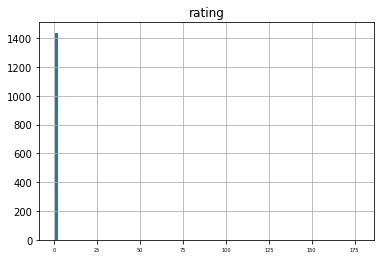

In [73]:
df_copy.hist(column='rating',xlabelsize = 5,bins=100)

we remove the highest rating 177.6 as a outlier and plot again.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c26dee710>]], dtype=object)

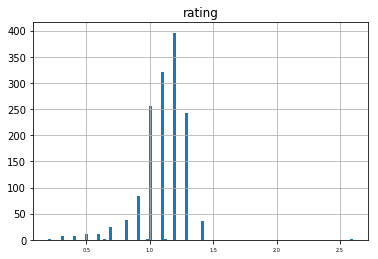

In [74]:
df_temp.hist(column='rating',xlabelsize = 5,bins=100)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c26cee0f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1c26a897b8>]], dtype=object)

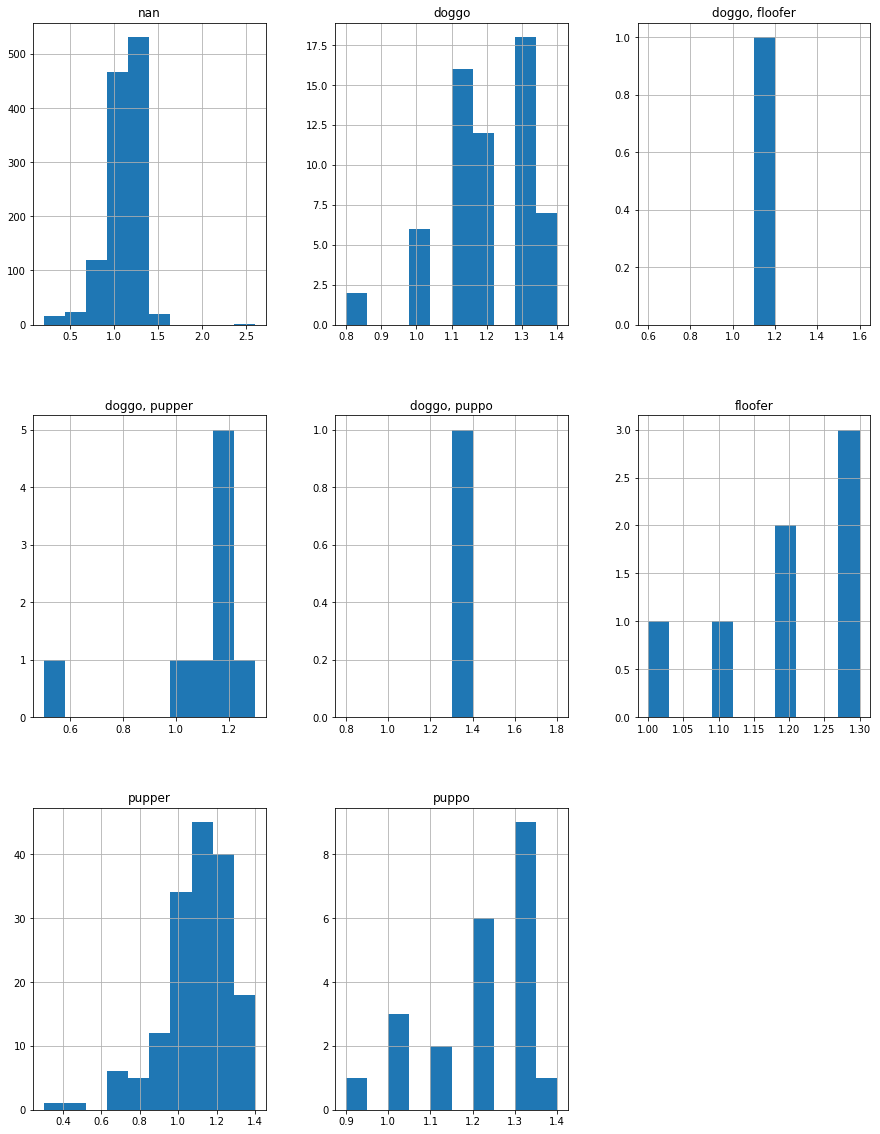

In [75]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_temp.reset_index().pivot('index','dog_stage','rating').hist(ax = ax)